### Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyis

In [5]:
df = pd.read_csv("3_features_phishing_enhanced.csv")
print(df.shape)
df.head()

(82486, 17)


,subject,body,label,source,subject_len,body_len,subject_density,body_density,num_links,num_special_chars,num_exclamations,has_bank_word,body_entropy,body_entropy_per_char,percent_digits,percent_punct,text
0,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,Assassin,24,1538,4.800000,6.835556,1,5,0,0,4.9731,0.003233,0.0670,0.1268,"Re: New Sequences Window Date: Wed, 21 ..."
1,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,Assassin,25,894,6.250000,7.982143,2,3,2,0,4.6876,0.005243,0.0134,0.2069,[zzzzteana] RE: Alexander Martin A posted:\nTa...
2,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,Assassin,25,1746,6.250000,6.901186,2,3,2,0,4.7850,0.002741,0.0074,0.1042,[zzzzteana] Moscow bomber Man Threatens Explos...
3,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,Assassin,37,1125,4.625000,6.818182,2,1,0,0,4.7567,0.004228,0.0240,0.0818,[IRR] Klez: The Virus That Won't Die Klez: Th...
4,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,Assassin,46,1047,5.111111,7.270833,3,3,2,0,4.7307,0.004518,0.0038,0.1691,Re: [zzzzteana] Nothing like mama used to make...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Seleziona solo le colonne numeriche, escludendo 'label'
numeric_features = df.select_dtypes(include='number').columns
numeric_features = numeric_features.drop('label')

# Normalizza le feature tra 0 e 1
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features)

# Plot delle distribuzioni
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(normalized_df[feature], bins=30, kde=True)
    plt.title(f'Distribuzione normalizzata di {feature}')
    plt.xlabel(f'{feature} (normalizzato)')
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


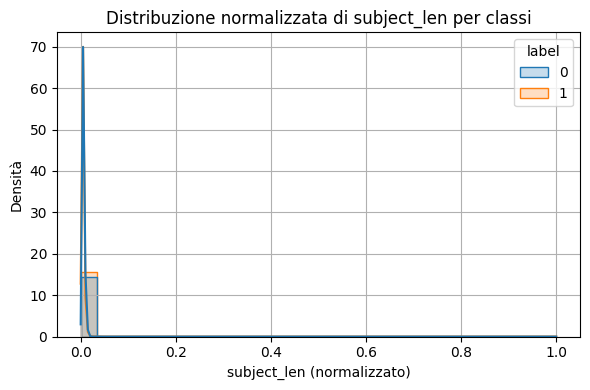

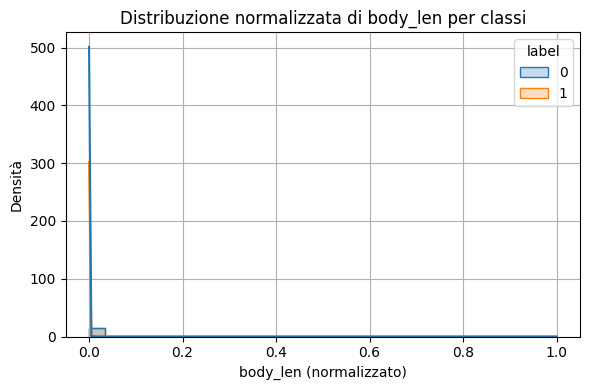

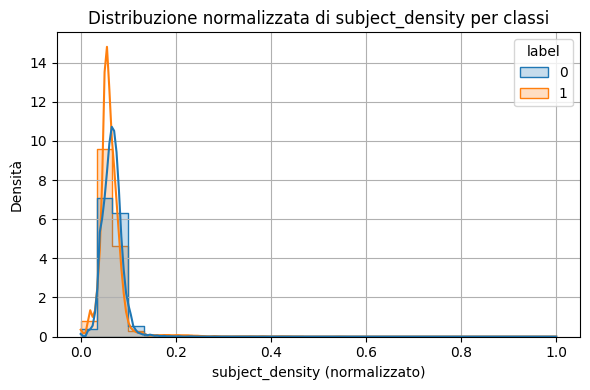

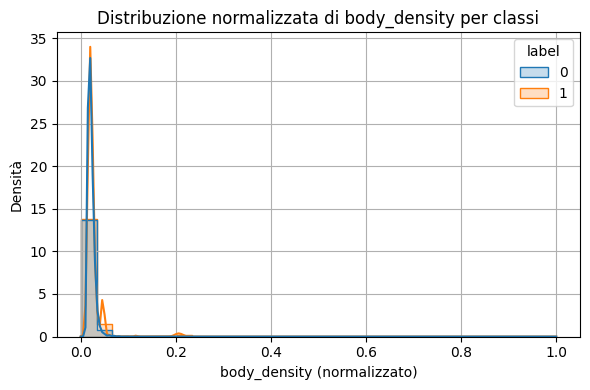

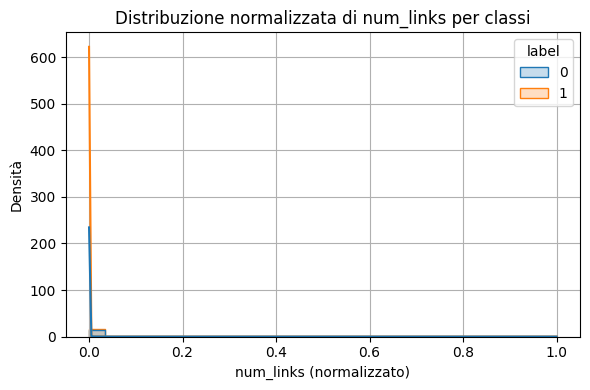

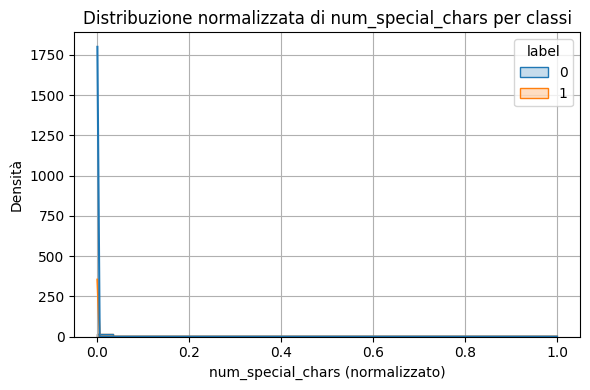

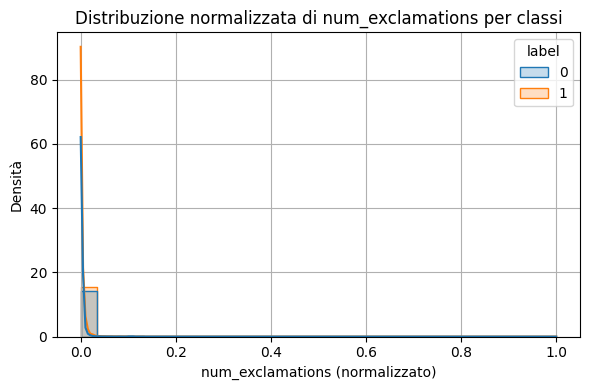

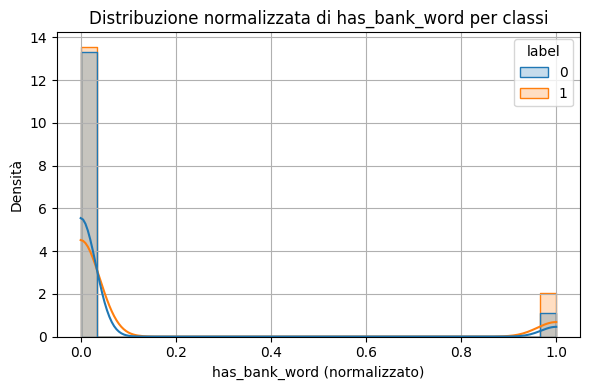

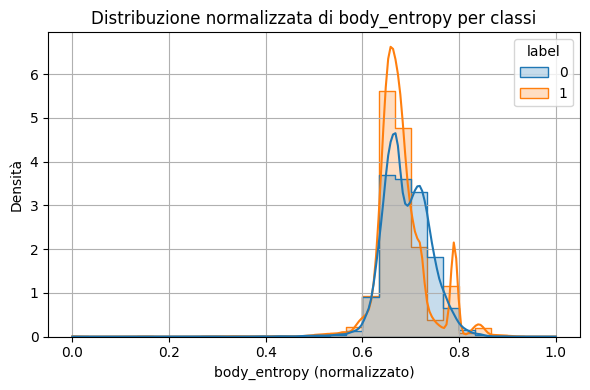

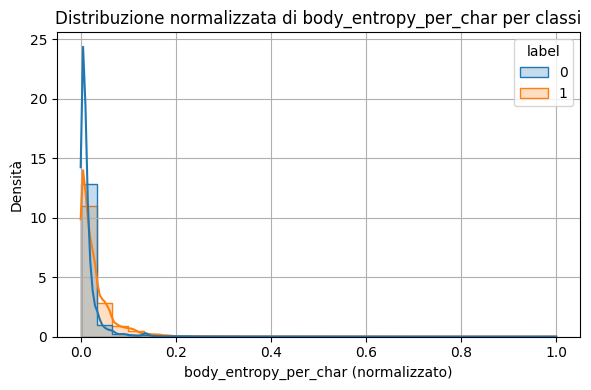

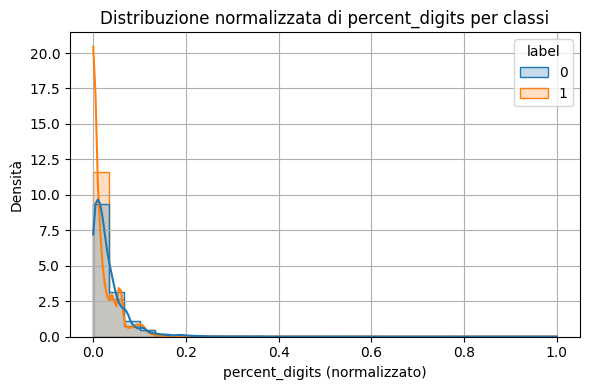

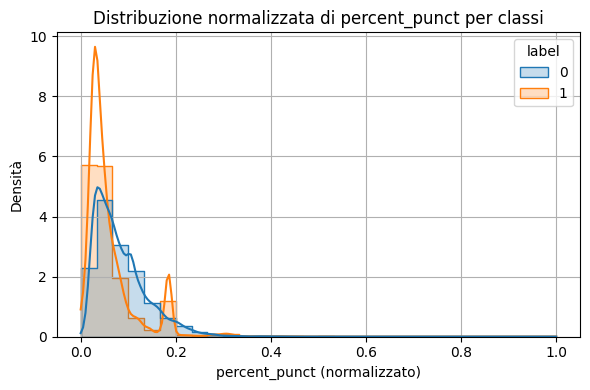

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleziona solo le colonne numeriche, escludendo 'label'
numeric_features = df.select_dtypes(include='number').columns
numeric_features = numeric_features.drop('label')

# Normalizza le feature tra 0 e 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(df[numeric_features])
normalized_df = pd.DataFrame(normalized_values, columns=numeric_features)
normalized_df['label'] = df['label'].values  # aggiungi la colonna label

# Plot delle distribuzioni per entrambe le classi
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=normalized_df, x=feature, hue='label', bins=30, kde=True, element='step', stat='density')
    plt.title(f'Distribuzione normalizzata di {feature} per classi')
    plt.xlabel(f'{feature} (normalizzato)')
    plt.ylabel('Densità')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [52]:
numeric_features = df.select_dtypes(include='number').columns
numeric_features = numeric_features.drop('label')  # rimuove la colonna target
print(numeric_features)


Index(['subject_len', 'body_len', 'subject_density', 'body_density',
       'num_links', 'num_special_chars', 'num_exclamations', 'has_bank_word',
       'body_entropy', 'body_entropy_per_char', 'percent_digits',
       'percent_punct'],
      dtype='object')


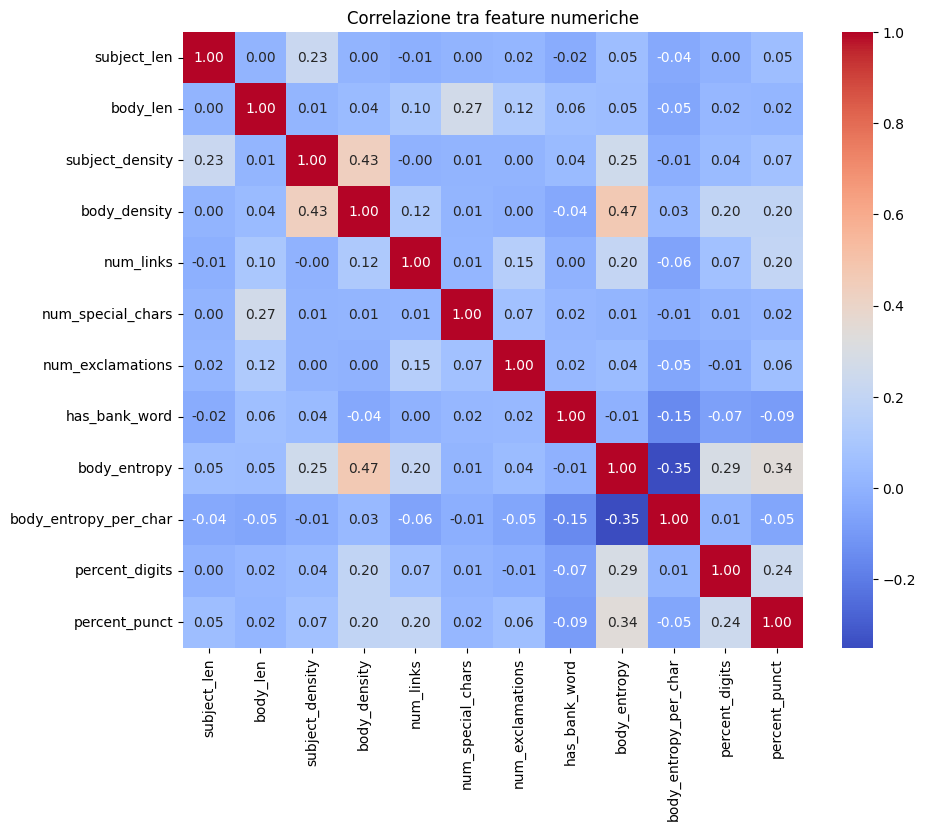

In [53]:
plt.figure(figsize=(10, 8))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlazione tra feature numeriche")
plt.show()


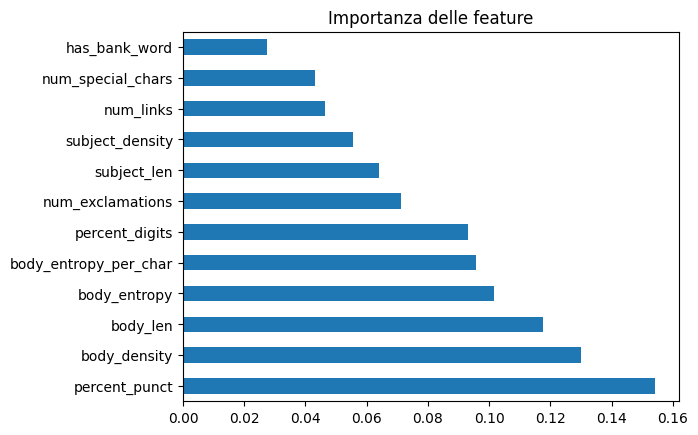

percent_punct            0.154252
body_density             0.130082
body_len                 0.117686
body_entropy             0.101606
body_entropy_per_char    0.095525
percent_digits           0.093134
num_exclamations         0.071285
subject_len              0.063976
subject_density          0.055561
num_links                0.046375
num_special_chars        0.043132
has_bank_word            0.027389
dtype: float64


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df[numeric_features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='barh', title='Importanza delle feature')
plt.show()
print(importances)


# Second Dataset

In [ ]:
df = pd.read_csv("3_features_phishing_enhanced.csv")
print(df.shape)
df.head()